# First Attempt
This is the first attempt to generate an example level.  The original developers have stated in interviews that the experience of playing a drumset was something they targeted.  For this level, I will attempt to model the geometry based on a drum beat, with different shapes corresponding to different drums.

The tempo for the level will be a steady 120 BPM to produce ratios easier to represent mathmatically

## Base Beat

This will represent a very basic This is a 4/4 rock beat, with a kick every beat, high-hat twice in a beat, and a snare every other beat. 

(this is 4 beats broken into 16ths)
```
|kick| x--- x--- x--- x---
|snar| x--- ---- x--- ----
|hhat| x-x- x-x- x-x- x-x-
```

At 120 beats per minute, 1 second has 2 beats.  quarter-notes (1 beat) are every 500ms, eighth-notes are every 250ms.  The beat above can be seen as four 500ms chunks

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
sns.set_theme()

In [28]:
# Create a dataframe to act like a drum sequencer
base_beat_df= pd.DataFrame(
    index=[x for x in range(0, 60*1000, 125)],  # 60 seconds of 8th notes @120 BPM
    columns=['kick', 'snar', 'hhat'],           # 3 drums in this beat
    data=np.full((480,3), False),               # Default all notes to off
)

# Calculate timestamps (ms) for 60 seconds of each drum in the base beat
base_beat_times = {
    'kick': [x for x in range(0, 60*1000, 500)],
    'snar': [x for x in range(0, 60*1000, 1000)],
    'hhat': [x for x in range(0, 60*1000, 250)],
}

# Write the beat to the sequencer df
for drum, times in base_beat_time.items():
    # Flip the bit to true using an index (loc)ate query
    base_beat_df[drum].loc[times] = True

<AxesSubplot:>

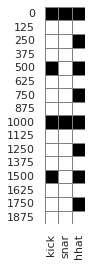

In [29]:
# View the sequencer
sns.heatmap(
    base_beat_df.iloc[:16],
    square=True,
    cbar=False,
    cmap='binary',
    linecolor='grey',
    linewidths=1.0,
)

## Turning the beat into features

My first guess for this beat's features would be a simple obsticle (block) every other beat (1 every second)

Looking backwards, this would appear to put an obsticle on the "loudest" note in a section, which lines up with previous guesses for effective level design.

In [38]:
# "Feature" specifications
features = [
    {
        'geometry_type': 'BLOCK',
        'inputs_required': {'BLOCK': True, 'PIT': False, 'LOOP': False, 'WAVE': False},
        'time': x*1000,
        'animation': 1,
        'input_window_length': 100,
    }
    for x in range(60)
]
json.dump(features, open('./level_0.json', 'w'))
json.load(open('./level_0.json', 'r'))

[{'geometry_type': 'BLOCK',
  'inputs_required': {'BLOCK': True,
   'PIT': False,
   'LOOP': False,
   'WAVE': False},
  'time': 0,
  'animation': 1,
  'input_window_length': 100},
 {'geometry_type': 'BLOCK',
  'inputs_required': {'BLOCK': True,
   'PIT': False,
   'LOOP': False,
   'WAVE': False},
  'time': 1000,
  'animation': 1,
  'input_window_length': 100},
 {'geometry_type': 'BLOCK',
  'inputs_required': {'BLOCK': True,
   'PIT': False,
   'LOOP': False,
   'WAVE': False},
  'time': 2000,
  'animation': 1,
  'input_window_length': 100},
 {'geometry_type': 'BLOCK',
  'inputs_required': {'BLOCK': True,
   'PIT': False,
   'LOOP': False,
   'WAVE': False},
  'time': 3000,
  'animation': 1,
  'input_window_length': 100},
 {'geometry_type': 'BLOCK',
  'inputs_required': {'BLOCK': True,
   'PIT': False,
   'LOOP': False,
   'WAVE': False},
  'time': 4000,
  'animation': 1,
  'input_window_length': 100},
 {'geometry_type': 'BLOCK',
  'inputs_required': {'BLOCK': True,
   'PIT': False,
 

# Minor pivot - Test-Tone like levels
After reflection, there is likely benefit to quickly building some basic level patterns while we are here.
We can create:

* Block (1000ms interval)
* Pit (500ms interval)
* Wave (1500ms interval)
* Block/Pit Alternating (500ms interval)

In [3]:
tone_features = {
    'block1000': [
        {
            'geometry_type': 'BLOCK',
            'animation': 1,
            'inputs_required': {'BLOCK': True, 'PIT': False, 'LOOP': False, 'WAVE': False},
            'input_window_length': 100,
            'time': x*1000,
        } 
        for x in range(60)  # 60 seconds / 1 second interval
    ],
    'pit500': [
        {
            'geometry_type': 'PIT',
            'animation': 1,
            'inputs_required': {'BLOCK': False, 'PIT': True, 'LOOP': False, 'WAVE': False},
            'input_window_length': 100,
            'time': x*500,
        } 
        for x in range(120)  # 60 seconds / 0.5 second interval
    ],
    'wave1500': [
        {
            'geometry_type': 'WAVE',
            'animation': 1,
            'inputs_required': {'BLOCK': False, 'PIT': False, 'LOOP': False, 'WAVE': True},
            'input_window_length': 100,
            'time': x*1500,
        } 
        for x in range(40)  # 60 seconds / 1.5 second interval
    ],
    'blockpit500': [
        {
            'geometry_type': 'PIT' if x%2 else 'BLOCK',
            'animation': 1,
            'inputs_required': {'BLOCK': False, 'PIT': True, 'LOOP': False, 'WAVE': False} if x%2 else {'BLOCK': True, 'PIT': False, 'LOOP': False, 'WAVE': False},
            'input_window_length': 100,
            'time': x*500,
        } 
        for x in range(120)  # 60 seconds / 0.5 second interval
    ]
}

for name, features in tone_features.items():
    json.dump(features, open(f'./level_{name}.json', 'w'))

## More complex patterns
Thinking more about this like a drum machine, there are likely patterns of features which occur, and patterns of timings (rhythems).  I want to focus on the features themselves right now and not the timings.  What common patterns can we create?

```
П V П V
П П V П
П П V V
П V П W
```